In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
import json
import os
import re
from json import loads
import plotly.express as px

# Helper

In [12]:
school_df = pd.read_csv("schoolname_UNITID.csv")

def search_school(school_name):
    # Case-insensitive search for school name
    result = school_df[school_df["inst_name"].str.contains(school_name, case=False, na=False)]
    if result.empty:
        print(f"No matches found for '{school_name}'.")
    return result

def get_school_name(unitid):
    # Fetch school directory data
    url = f"https://educationdata.urban.org/api/v1/college-university/ipeds/directory/2020/?unitid={unitid}"
    response = urlopen(url)
    data = loads(response.read())
    
    results = data.get("results", [])
    if results:
        school_name = results[0].get("inst_name", "Unknown")
        return school_name
    else:
        return f"No school found for unitid {unitid}"

def search_school_by_state(state_abbr):
    """Search for schools in a given state (by abbreviation) and return a DataFrame with unitid and school name.
    """
    url = "https://educationdata.urban.org/api/v1/college-university/ipeds/directory/2020/"
    
    try:
        response = urlopen(url)
        data = loads(response.read())
        results = data.get("results", [])
        
        if not results:
            print(f"No schools found.")
            return pd.DataFrame()
        
        # Filter results manually based on state_abbr
        filtered_results = [
            {"unitid": result.get("unitid"), "school_name": result.get("inst_name", "Unknown")}
            for result in results if result.get("state_abbr") == state_abbr.upper()
        ]
        
        if not filtered_results:
            print(f"No schools found in {state_abbr}.")
            return pd.DataFrame()
        
        return pd.DataFrame(filtered_results)
    
    except Exception as e:
        print(f"Error fetching data: {e}")
        return pd.DataFrame()
        

In [17]:
NJ_schools = search_school_by_state("nj")

if not NJ_schools.empty:
    # Extract the list of unitid values
    NJ_unitid_list = NJ_schools["unitid"].tolist()
    print("List of UNITIDs for schools in New Jersey:", NJ_unitid_list)

    # Fetch and print school names for each unitid
    for unitid in NJ_unitid_list:
        school_name = get_school_name(unitid)
        print(f"UNITID: {unitid}, School Name: {school_name}")
else:
    print("No schools found in New Jersey.")

List of UNITIDs for schools in New Jersey: [183488, 183600, 183655, 183725, 183743, 183789, 183804, 183822, 183859, 183877, 183910, 183938, 183974, 183983, 184047, 184056, 184092, 184180, 184205, 184278, 184348, 184427, 184481, 184506, 184603, 184612, 184694, 184746, 184773, 184782, 184791, 184816, 184870, 184959, 184968, 184995, 185129, 185174, 185262, 185332, 185396, 185466, 185509, 185536, 185572, 185590, 185679, 185721, 185758, 185767, 185828, 185873, 185970, 186016, 186034, 186052, 186122, 186131, 186186, 186201, 186283, 186371, 186380, 186399, 186405, 186423, 186432, 186469, 186584, 186593, 186618, 186645, 186867, 186876, 186900, 187000, 187046, 187134, 187198, 187444, 194718, 245625, 247603, 249140, 363077, 365763, 368230, 374574, 374592, 383279, 384421, 407391, 407407, 407425, 414063, 417831, 420130, 420343, 421878, 430218, 430403, 431716, 436003, 437723, 440794, 441548, 442073, 443216, 443225, 445300, 446224, 446303, 448354, 448983, 449658, 451370, 451398, 453215, 455187, 4551

Get a UNITIDs of New Jersey schools

In [13]:
NJ_schools = search_school_by_state("nj")

if not NJ_schools.empty:
    # Extract the list of unitid values
    NJ_unitid_list = NJ_schools["unitid"].tolist()
    print("List of UNITIDs for schools in New Jersey:", NJ_unitid_list)

    # Fetch and print school names for each unitid
    for unitid in NJ_unitid_list:
        school_name = get_school_name(unitid)
        print(f"UNITID: {unitid}, School Name: {school_name}")
else:
    print("No schools found in New Jersey.")

List of UNITIDs for schools in New Jersey: [183488, 183600, 183655, 183725, 183743, 183789, 183804, 183822, 183859, 183877, 183910, 183938, 183974, 183983, 184047, 184056, 184092, 184180, 184205, 184278, 184348, 184427, 184481, 184506, 184603, 184612, 184694, 184746, 184773, 184782, 184791, 184816, 184870, 184959, 184968, 184995, 185129, 185174, 185262, 185332, 185396, 185466, 185509, 185536, 185572, 185590, 185679, 185721, 185758, 185767, 185828, 185873, 185970, 186016, 186034, 186052, 186122, 186131, 186186, 186201, 186283, 186371, 186380, 186399, 186405, 186423, 186432, 186469, 186584, 186593, 186618, 186645, 186867, 186876, 186900, 187000, 187046, 187134, 187198, 187444, 194718, 245625, 247603, 249140, 363077, 365763, 368230, 374574, 374592, 383279, 384421, 407391, 407407, 407425, 414063, 417831, 420130, 420343, 421878, 430218, 430403, 431716, 436003, 437723, 440794, 441548, 442073, 443216, 443225, 445300, 446224, 446303, 448354, 448983, 449658, 451370, 451398, 453215, 455187, 4551

# Process data

In [3]:
sfa_path = 'sfa/sfa2223.csv'
df = pd.read_csv(sfa_path)
print(df.columns)

Index(['UNITID', 'XSCUGRAD', 'SCUGRAD', 'XSCUGDGSK', 'SCUGDGSK', 'XSCUGNDGS',
       'SCUGNDGS', 'XSCUGFFN', 'SCUGFFN', 'XSCUGFFP',
       ...
       'XNPT410', 'NPT410', 'XNPT420', 'NPT420', 'XNPT430', 'NPT430',
       'XNPT440', 'NPT440', 'XNPT450', 'NPT450    '],
      dtype='object', length=691)


In [21]:
def shorten_var_title(title):
    title = title.lower()
    title = re.sub(r'[^a-z0-9]+', ' ', title)
    return '_'.join(title.split())

def process_sfa_data(unitid, sfa_file_path="sfa/sfa2223.csv", var_dict_path="sfa/sfa_dict.xlsx"):
    """
    Process SFA data for a given unitid using the raw data and its variable dictionary.
    Returns a cleaned DataFrame for that school.
    """

    # Load data and dictionary
    df = pd.read_csv(sfa_file_path)
    varlist = pd.read_excel(var_dict_path, sheet_name="varlist")

    # Map original varnames to clean column names
    varname_map = {
        row["varname"]: shorten_var_title(row["varTitle"])
        for _, row in varlist.iterrows()
    }

    # Only rename those that exist in df
    rename_dict = {k: v for k, v in varname_map.items() if k in df.columns}
    df = df.rename(columns=rename_dict)

    # Filter for this unitid
    unitid_col = "unitid"
    if unitid_col not in df.columns:
        raise ValueError(f"{unitid_col} not found in SFA data.")

    df = df[df[unitid_col] == unitid].copy()
    if df.empty:
        print(f"No SFA data for unitid {unitid}")
        return pd.DataFrame()

    # Keep only numeric columns
    numeric_cols = df.select_dtypes(include="number")
    numeric_cols[unitid_col] = unitid

    # Add metadata
    numeric_cols["university_name"] = get_school_name(unitid)
    numeric_cols["year"] = "2022–23"

    # Reorder columns
    col_order = ["unitid", "university_name", "year"] + \
                [col for col in numeric_cols.columns if col not in ["unitid", "university_name", "year"]]

    return numeric_cols[col_order]


In [22]:
NJ_schools = search_school_by_state("nj")
NJ_unitid_list = NJ_schools["unitid"].tolist()

all_sfa_data = pd.DataFrame()
for unitid in NJ_unitid_list:
    unitid_df = process_sfa_data(unitid)
    if not unitid_df.empty:
        all_sfa_data = pd.concat([all_sfa_data, unitid_df], ignore_index=True)

output_path = "sfa/NJ_sfa_data.csv"
all_sfa_data.to_csv(output_path, index=False)
print(f"SFA data saved to: {output_path}")

No SFA data for unitid 184047
No SFA data for unitid 184278
No SFA data for unitid 184870
No SFA data for unitid 185174
No SFA data for unitid 185332
No SFA data for unitid 185758
No SFA data for unitid 186122
No SFA data for unitid 249140
No SFA data for unitid 363077
No SFA data for unitid 407391
No SFA data for unitid 407407
No SFA data for unitid 407425
No SFA data for unitid 430218
No SFA data for unitid 436003
No SFA data for unitid 441548
No SFA data for unitid 445300
No SFA data for unitid 448354
No SFA data for unitid 448983
No SFA data for unitid 458849
No SFA data for unitid 478661
No SFA data for unitid 481508
No SFA data for unitid 484321
No SFA data for unitid 486734
No SFA data for unitid 495314
No SFA data for unitid 495475
SFA data saved to: sfa/NJ_sfa_data.csv


# 1. Distribution

In [42]:
csv_path = "sfa/sfa2223.csv"
df = pd.read_csv(csv_path)

# Select and rename the relevant columns
selected_columns = {
    'UNITID': 'unit_id',
    'UAGRNTP': 'percent_any_grant_aid',
    'UFLOANP': 'percent_federal_loans',
    'UPGRNTP': 'percent_pell_grants',
    'UAGRNTT': 'total_grants',
    'UPGRNTT': 'total_pell',
    'UFLOANT': 'total_loans'
}

# Filter and rename
df_selected = df[list(selected_columns.keys())].rename(columns=selected_columns)
# Filter df_selected to only include rows where unit_id is in the NJ_unitid_list
df_selected = df_selected[df_selected['unit_id'].isin(NJ_unitid_list)]

# Display the resulting DataFrame
df_selected.head()

,unit_id,percent_any_grant_aid,percent_federal_loans,percent_pell_grants,total_grants,total_pell,total_loans
1751,183488,100,58,76,5578368,1978724,2068114
1752,183600,61,0,0,119110,0,0
1753,183655,76,7,50,14474485,8702397,1726821
1754,183725,73,71,73,2242447,2120128,2787493
1755,183743,90,17,34,34026957,16724914,10674069


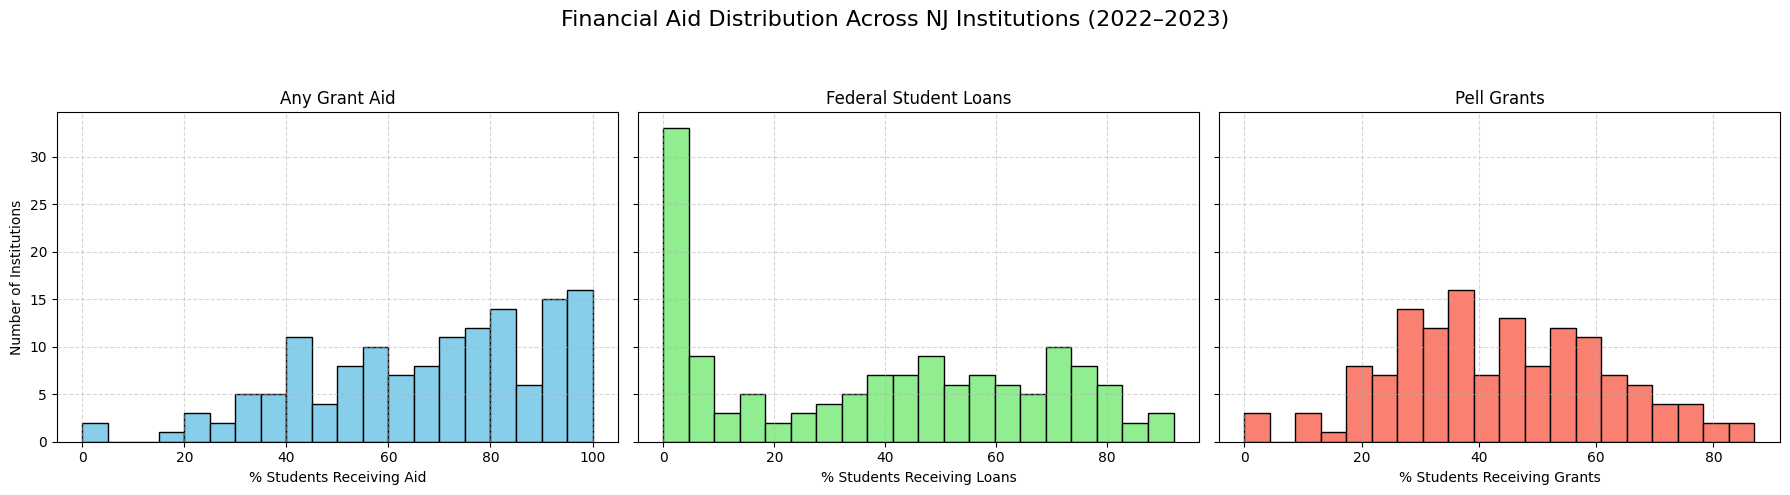

In [51]:
# Set up multi-panel plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Financial Aid Distribution Across NJ Institutions (2022–2023)', fontsize=16)

# Plot histogram for each type of aid
df_selected['percent_any_grant_aid'].plot.hist(ax=axes[0], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Any Grant Aid')
axes[0].set_xlabel('% Students Receiving Aid')

df_selected['percent_federal_loans'].plot.hist(ax=axes[1], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Federal Student Loans')
axes[1].set_xlabel('% Students Receiving Loans')

df_selected['percent_pell_grants'].plot.hist(ax=axes[2], bins=20, color='salmon', edgecolor='black')
axes[2].set_title('Pell Grants')
axes[2].set_xlabel('% Students Receiving Grants')

# Set common y-label
for ax in axes:
    ax.set_ylabel('Number of Institutions')
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


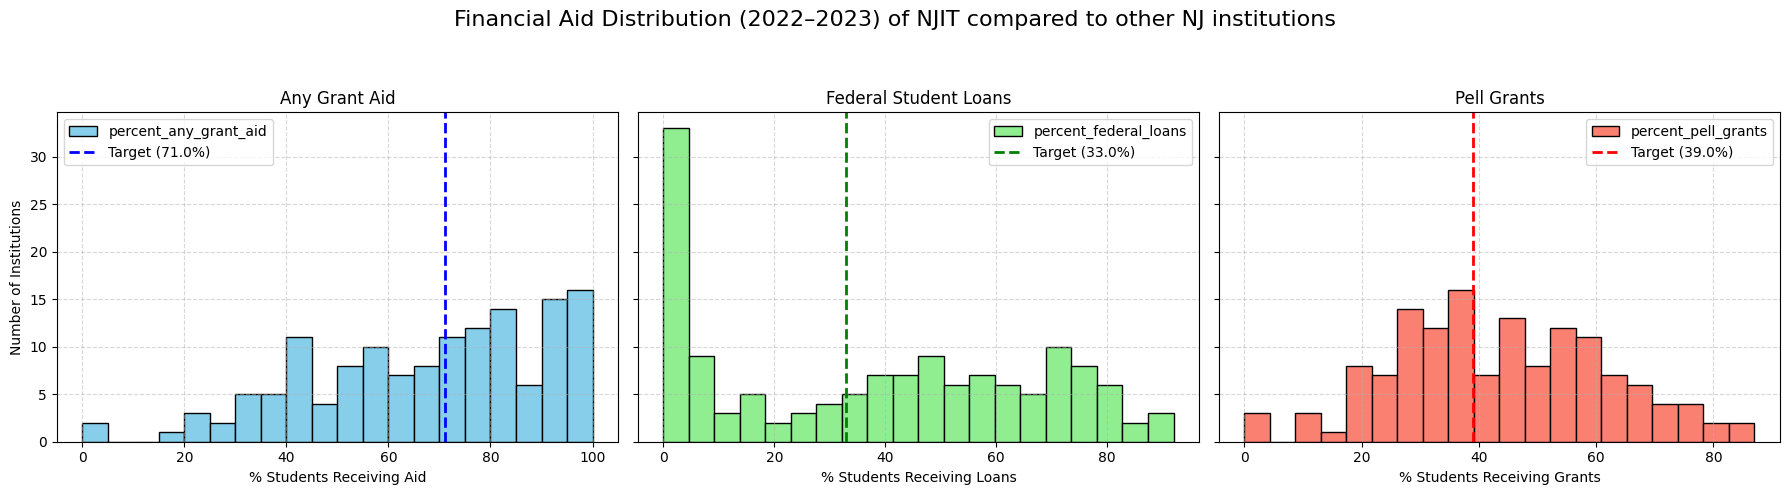

In [50]:
# Set your target unitid
target_unitid = 185828  # NJIT

# Extract values for that institution
target_row = df_selected[df_selected["unit_id"] == target_unitid]
if target_row.empty:
    print(f"UNITID {target_unitid} not found in dataset.")
else:
    val_grant = target_row["percent_any_grant_aid"].values[0]
    val_loan = target_row["percent_federal_loans"].values[0]
    val_pell = target_row["percent_pell_grants"].values[0]

    # Set up multi-panel plot
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    fig.suptitle('Financial Aid Distribution (2022–2023) of NJIT compared to other NJ institutions', fontsize=16)

    # Any Grant Aid
    df_selected['percent_any_grant_aid'].plot.hist(ax=axes[0], bins=20, color='skyblue', edgecolor='black')
    axes[0].axvline(val_grant, color='blue', linestyle='--', linewidth=2, label=f'Target ({val_grant:.1f}%)')
    axes[0].set_title('Any Grant Aid')
    axes[0].set_xlabel('% Students Receiving Aid')
    axes[0].legend()

    # Federal Student Loans
    df_selected['percent_federal_loans'].plot.hist(ax=axes[1], bins=20, color='lightgreen', edgecolor='black')
    axes[1].axvline(val_loan, color='green', linestyle='--', linewidth=2, label=f'Target ({val_loan:.1f}%)')
    axes[1].set_title('Federal Student Loans')
    axes[1].set_xlabel('% Students Receiving Loans')
    axes[1].legend()

    # Pell Grants
    df_selected['percent_pell_grants'].plot.hist(ax=axes[2], bins=20, color='salmon', edgecolor='black')
    axes[2].axvline(val_pell, color='red', linestyle='--', linewidth=2, label=f'Target ({val_pell:.1f}%)')
    axes[2].set_title('Pell Grants')
    axes[2].set_xlabel('% Students Receiving Grants')
    axes[2].legend()

    # Set common y-label
    for ax in axes:
        ax.set_ylabel('Number of Institutions')
        ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()



Variable: percent_any_grant_aid (UAGRNTP)
Full Name:
Percent of undergraduate students awarded federal, state, local, institutional, or other sources of grant aid

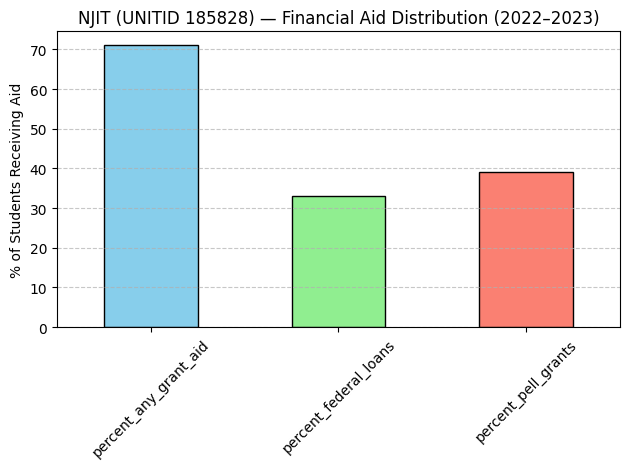

In [32]:
# Choose the institution by UNITID
target_unitid = 185828  # NJIT

# Extract row for NJIT
njit_data = df_selected[df_selected["unit_id"] == target_unitid]
if njit_data.empty:
    print("NJIT data not found.")
else:
    # Get the percentage values
    aid_values = njit_data[['percent_any_grant_aid', 'percent_federal_loans', 'percent_pell_grants']].iloc[0]

    # Plot as bar chart
    aid_values.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')
    plt.title("NJIT (UNITID 185828) — Financial Aid Distribution (2022–2023)")
    plt.ylabel('% of Students Receiving Aid')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

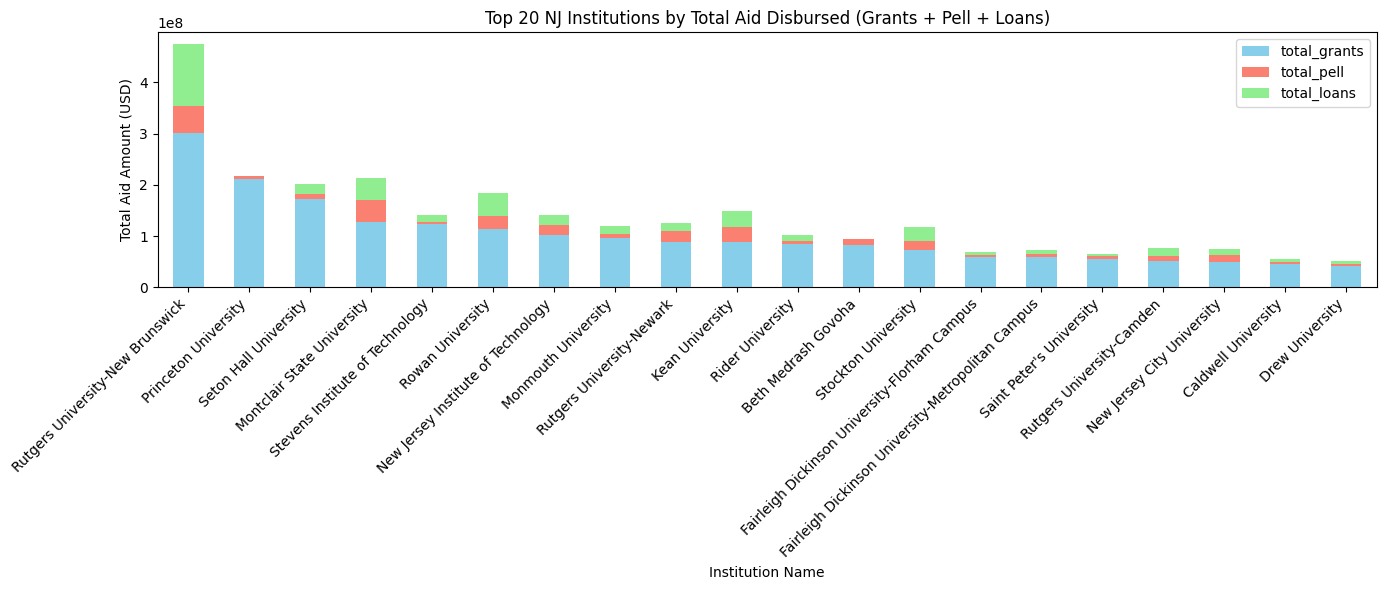

In [45]:
# Sort and take top 20 by total_grants
df_top = df_selected.sort_values(by='total_grants', ascending=False).head(20).copy()

# Add school names
df_top['school_name'] = df_top['unit_id'].apply(get_school_name)

# Plot
ax = df_top.plot(
    x='school_name',
    y=['total_grants', 'total_pell', 'total_loans'],
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    color=['skyblue', 'salmon', 'lightgreen']
)

# Customize plot
plt.title("Top 20 NJ Institutions by Total Aid Disbursed (Grants + Pell + Loans)")
plt.ylabel("Total Aid Amount (USD)")
plt.xlabel("Institution Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

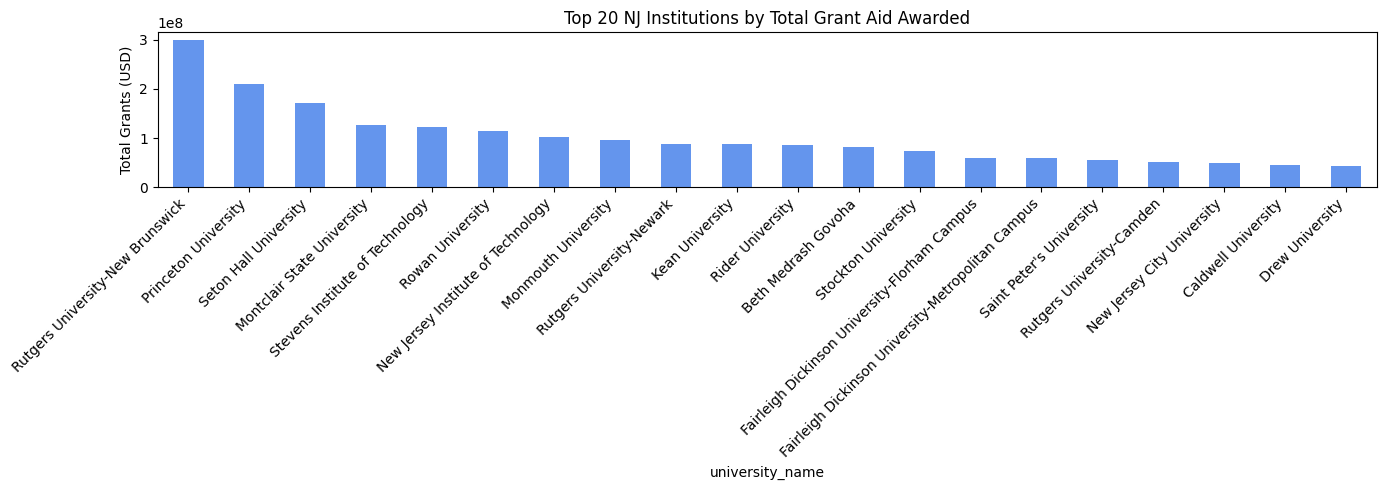

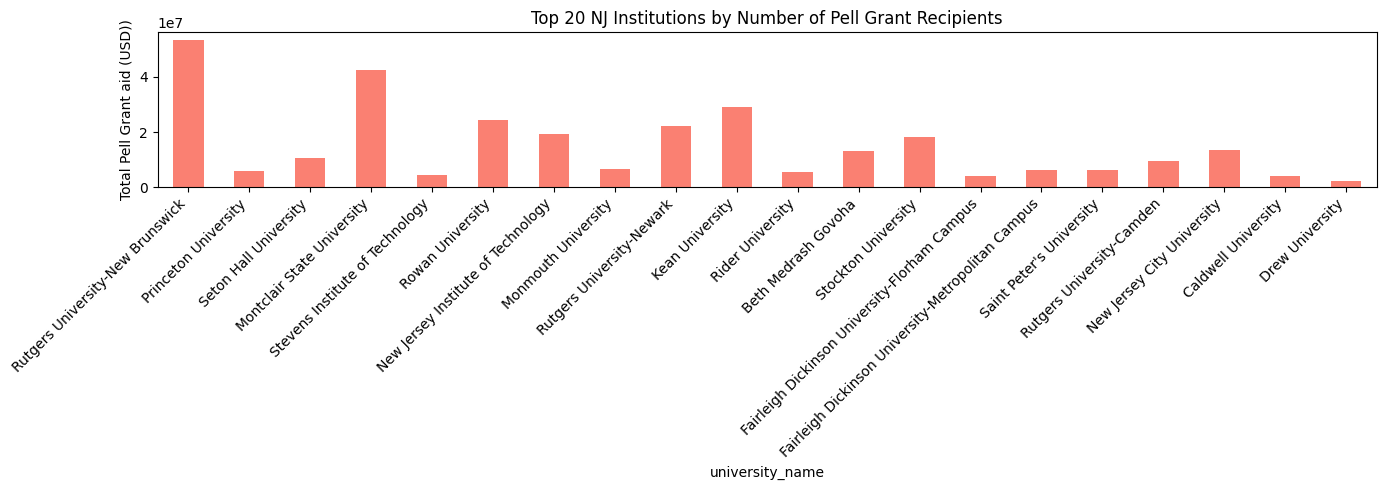

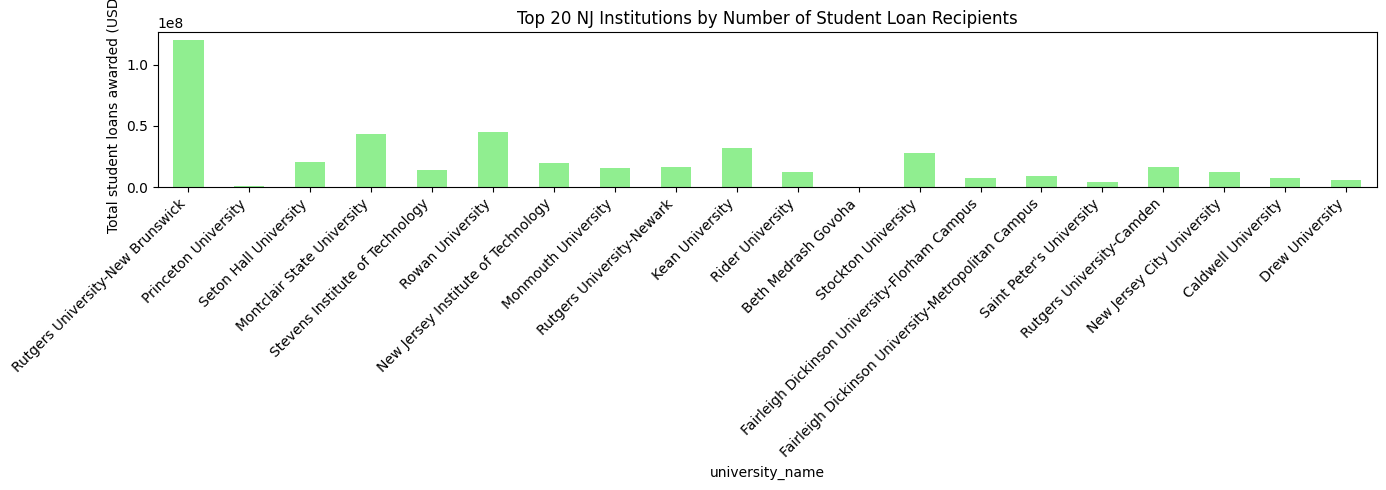

In [28]:
# Use your actual column names
grant_col = 'total_amount_of_federal_state_local_institutional_or_other_sources_of_grant_aid_awarded_to_undergraduate_students'
pell_col = 'total_amount_of_federal_pell_grant_aid_awarded_to_undergraduate_students'
loan_col = 'total_amount_of_federal_student_loans_awarded_to_undergraduate_students'

# Sort and select top 20 institutions by grant amount
df_top = all_sfa_data.sort_values(by=grant_col, ascending=False).head(20).copy()

# Fill NaNs with 0 for stacking
df_top[[grant_col, pell_col, loan_col]] = df_top[[grant_col, pell_col, loan_col]].fillna(0)

# Set the university name as index for plotting
df_top.set_index('university_name', inplace=True)

# Grants in $ (chart 1)
plt.figure(figsize=(14, 5))
df_top[grant_col].plot(kind='bar', color='cornflowerblue')
plt.title('Top 20 NJ Institutions by Total Grant Aid Awarded')
plt.ylabel('Total Grants (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pell Recipients (chart 2)
plt.figure(figsize=(14, 5))
df_top[pell_col].plot(kind='bar', color='salmon')
plt.title('Top 20 NJ Institutions by Number of Pell Grant Recipients')
plt.ylabel('Total Pell Grant aid (USD))')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Loan Recipients (chart 3)
plt.figure(figsize=(14, 5))
df_top[loan_col].plot(kind='bar', color='lightgreen')
plt.title('Top 20 NJ Institutions by Number of Student Loan Recipients')
plt.ylabel('Total student loans awarded (USD))')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [37]:
df_top.head()

,unit_id,total_grants,total_pell,total_loans
418,123961,637285590,24282555,32179523
70,104151,627107650,105571182,123031952
1994,193900,543877540,31159838,40980071
1292,164988,452274826,18075985,23893510
1900,190415,445052683,15736358,18450144


In [4]:
csv_path = "sfa/sfa2223_processed.csv"
df = pd.read_csv(csv_path)

# 3. Average Net Price Students Paid for the 2020–21 Academic Year

Net price is the actual amount a student or family pays to attend a college, after subtracting grants and scholarships from the total cost.

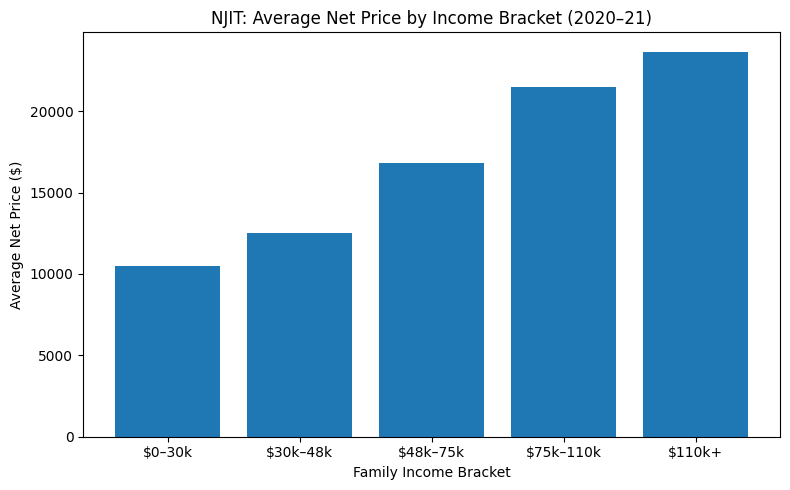

In [7]:
price_columns = [
    'average_net_price_income_0_30_000_students_awarded_title_iv_federal_financial_aid_2020_21',
    'average_net_price_income_30_001_48_000_students_awarded_title_iv_federal_financial_aid_2020_21',
    'average_net_price_income_48_001_75_000_students_awarded_title_iv_federal_financial_aid_2020_21',
    'average_net_price_income_75_001_110_000_students_awarded_title_iv_federal_financial_aid_2020_21',
    'average_net_price_income_over_110_000_students_awarded_title_iv_federal_financial_aid_2020_21'
]

# Bracket labels
bracket_labels = ['$0–30k', '$30k–48k', '$48k–75k', '$75k–110k', '$110k+']

# Extract NJIT row
njit = df[df['unique_identification_number_of_the_institution'] == 185828]

# Extract values and clean
prices = njit[price_columns].iloc[0].replace(['PrivacySuppressed', 'NULL'], pd.NA)
prices = prices.astype(float)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(bracket_labels, prices)
plt.title('NJIT: Average Net Price by Income Bracket (2020–21)')
plt.ylabel('Average Net Price ($)')
plt.xlabel('Family Income Bracket')
plt.tight_layout()
plt.show()
